## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Check Data

In [2]:
df = pd.read_csv('../data/processed/cmbd.csv')
df.head()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,4,4,2,2,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,17,1,1,1,2,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,2,15,1,1,1,2,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
3,3,15,4,2,1,3,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,4,16,3,3,1,2,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         649 non-null    int64
 1   age                649 non-null    int64
 2   Medu               649 non-null    int64
 3   Fedu               649 non-null    int64
 4   traveltime         649 non-null    int64
 5   studytime          649 non-null    int64
 6   failures           649 non-null    int64
 7   schoolsup          649 non-null    int64
 8   famsup             649 non-null    int64
 9   paid               649 non-null    int64
 10  activities         649 non-null    int64
 11  nursery            649 non-null    int64
 12  higher             649 non-null    int64
 13  internet           649 non-null    int64
 14  romantic           649 non-null    int64
 15  famrel             649 non-null    int64
 16  freetime           649 non-null    int64
 17  goout           

In [4]:
df['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

## Finalize Pre-processing and Scaling

In [5]:
df['not_sufficient'] = np.where(df['G3'] >= 9.5, 0.0, 1.0)
df['not_sufficient'].value_counts()

0.0    549
1.0    100
Name: not_sufficient, dtype: int64

In [6]:
y = df['not_sufficient']
X = df.drop(['G1','G2','G3','not_sufficient'], axis=1)

In [7]:
#Import ML models:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.learning_curve import validation_curve

# Splitting the dataset into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling:

scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

## Dummy Classifier

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve

# define model
mf_dummy = DummyClassifier(strategy='most_frequent')
# fit model
mf_dummy.fit(X, y)
# make predictions
yhat = mf_dummy.predict(X)
# calculate accuracy
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.846


## Logistic Regression

In [9]:
parameters = {
    'C': (0.001,0.01,0.1,1,10,100),
    'penalty': ('l1', 'l2'),
}

gs = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), parameters)
gs.fit(X_train, y_train)

# Score the grid search model with the testing data
accuracy = gs.score(X_test, y_test)

print('Best parameters: %r' % gs.best_params_ )
print('Accuracy: %.3f' % accuracy)

Best parameters: {'C': 0.1, 'penalty': 'l1'}
Accuracy: 0.892


## Classifiers

[[169   0]
 [ 25   1]]
0.8717948717948718


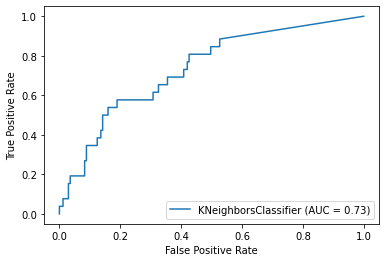

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=10)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)
knn_disp= plot_roc_curve(knn,X_test,y_test)

[[165   4]
 [ 16  10]]
0.8974358974358975


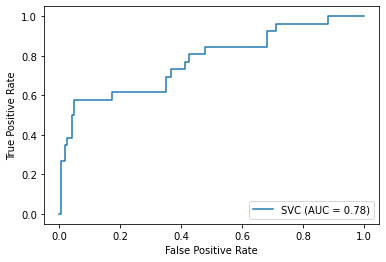

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)
knn_disp= plot_roc_curve(svm,X_test,y_test)

[[166   3]
 [ 24   2]]
0.8615384615384616


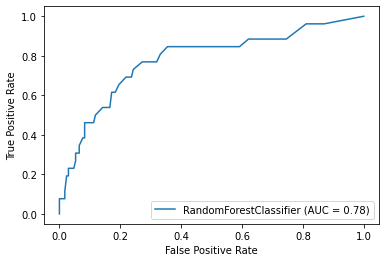

In [12]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)
knn_disp= plot_roc_curve(rf,X_test,y_test)

[[166   3]
 [ 20   6]]
0.882051282051282


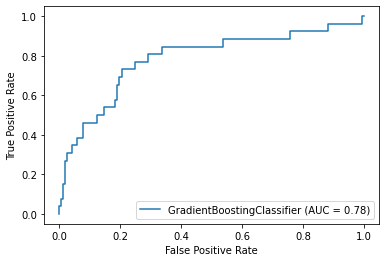

In [13]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)
knn_disp= plot_roc_curve(gbc,X_test,y_test)

## With Oversampling

In [20]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y.value_counts())

1.0    549
0.0    549
Name: not_sufficient, dtype: int64


[[133  42]
 [ 21 134]]
0.8090909090909091


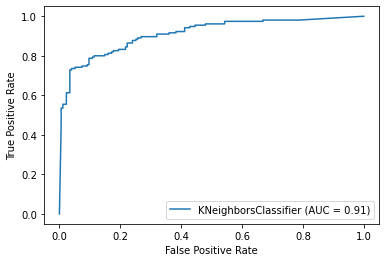

In [21]:
# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=10)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)
knn_disp= plot_roc_curve(knn,X_test,y_test)

[[166   9]
 [ 23 132]]
0.9030303030303031


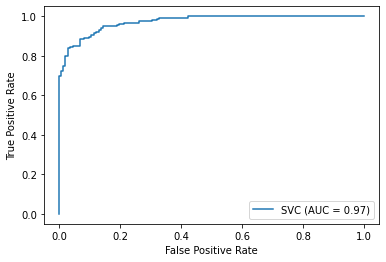

In [22]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)
knn_disp= plot_roc_curve(svm,X_test,y_test)

[[163  12]
 [ 12 143]]
0.9272727272727272


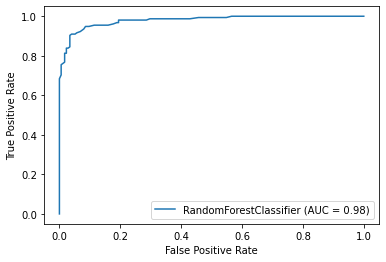

In [23]:
#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)
knn_disp= plot_roc_curve(rf,X_test,y_test)

[[165  10]
 [ 10 145]]
0.9393939393939394


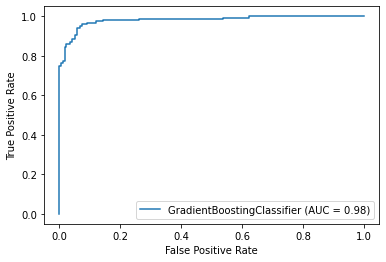

In [24]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)
knn_disp= plot_roc_curve(gbc,X_test,y_test)